Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa. Em uma das simulações, introduza um defeito de molas:  substitua duas molas que ligam uma massa por (k2=5k)
 
Parâmetros
• Massas padrão:  m=1 kg
 • Constante elástica: k = 1 N/m
 • Tamanhos da cadeia: N = 100, 1000 e 10.000
• Defeito: massa igual a k2 = 5k  (apenas em uma das simulações)
 
Tarefas  
1. Cálculo das Frequências de Vibração  
• Para cada valor de  (100, 1000, 10000), calcule as frequências naturais de vibração do sistema para:  
• Cadeia homogênea (todas as massas iguais)  
• Cadeia com defeito de massa no centro  
2. Densidade de Estados  
• Construa histogramas (densidade de estados) para os valores de  obtidos em cada caso.  
• Compare os histogramas para diferentes tamanhos de cadeia e para a presença/ausência do defeito.  
3. Deslocamentos Relativos (Modos Normais)  
• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:  
• Às cinco menores frequências (modos de baixa energia)  
• Às cinco maiores frequências (modos de alta energia)  
• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.  
4. Análise e Comparação  
• Analise como o tamanho da cadeia e a presença do defeito afetam:  
• A distribuição das frequências (densidade de estados)  
• Os padrões de deslocamento dos modos normais  
• Discuta a localização dos modos associados ao defeito de massa.  
Orientações para Implementação em Python  
• O código deve ser bem documentado e comentado, facilitando o entendimento de cada etapa do processo.  
• Utilize bibliotecas como `numpy` e `matplotlib` para cálculos e visualizações.  
• Monte a matriz dinâmica do sistema e calcule seus autovalores e autovetores.  
• Para grandes valores de , otimize o código para eficiência computacional.  
• Disponibilize o código final em um repositório no GitHub e inclua o link no relatório.  
   
Instruções para Entrega  
 • A resposta deve ser enviada via Moodle devidamente comentada.  
• Inclua todos os gráficos gerados (histogramas, modos normais, etc.) no arquivo de resposta, pois não será possível rodar todos os programas novamente para correção.  
• Certifique-se de que cada gráfico esteja devidamente identificado e relacionado ao caso analisado.  
   
Sugestão de Estrutura para a resposta  
1. Introdução  
• Breve explicação do modelo massa-mola e sua relevância para cadeias atômicas.  
2. Metodologia  
• Descrição do método numérico utilizado para calcular frequências e modos.  
3. Resultados  
• Histogramas das densidades de estados para cada caso.  
• Gráficos dos deslocamentos relativos para os modos selecionados.  
• Tabela comparativa dos principais resultados.  
4. Discussão  
• Interpretação dos efeitos do tamanho da cadeia e do defeito de massa.    
• Observações sobre a localização dos modos e possíveis aplicações.  
5. Conclusão  
• Síntese dos principais achados.  
Observação: Comente o código de forma clara, disponibilize o link do GitHub e anexe todos os gráficos no Moodle para garantir a avaliação completa.  

### Preâmbulo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.sparse import diags, csr_matrix
import pandas as pd

In [2]:
#Parâmetros
m, k1, k2 = 1.0, 1.0, 5.0
N1, N2, N3 = 100, 1000, 10000

### Cadeia de 100 átomos

In [3]:
# Inicializa a matriz D com zeros
D100 = np.zeros((N1, N1))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(N1):
    if i == N1-1:  # Última massa
        D100[i, i] = 2*k1/m
        D100[i, i-1] = -k1/m
    else:  
        D100[i, i] = 2*k1/m
        D100[i, i-1] = -k1/m
        D100[i, i+1] = -k1/m

Cria a matriz com problema de massa

In [4]:
#cria a matriz com problema de massa
D100_mod = D100.copy()
D100_mod[49, :] *= k2

Autovalores, autovetores e $\omega_i$

In [5]:
ww100, v100 = eigh(D100)
w100 = np.sqrt(ww100) 

ww100_mod, v100_mod = eigh(D100_mod)
w100_mod = np.sqrt(np.abs(ww100_mod))

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_5211/1250270834.py:10: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_title('Distribuição de $\omega_{100}$ (Original)')
/tmp/ipykernel_5211/1250270834.py:11: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('$\omega$')
/tmp/ipykernel_5211/1250270834.py:21: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_title('Distribuição de $\omega_{100}$ (Modificada)')
/tmp/ipykernel_5211/1250270834.py:22: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_xlabel('$\omega$')


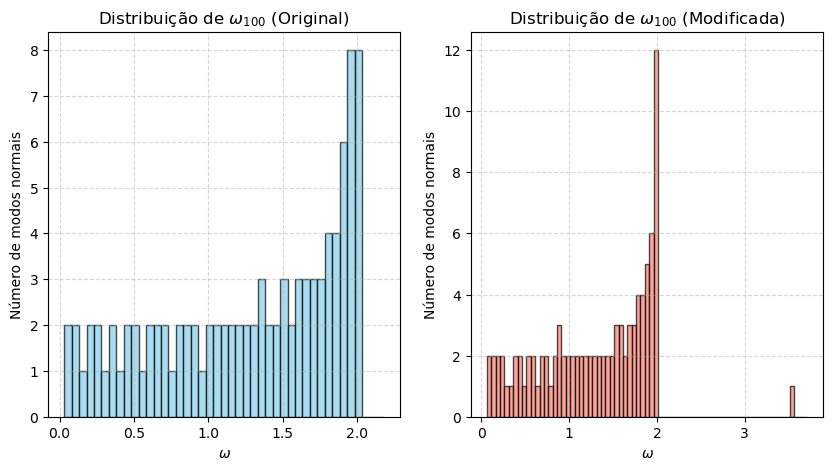

In [6]:
# Configuração do histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# --- Subplot 1: Histograma de w100 ---
ax1.hist(w100, 
         bins=np.arange(min(w100), max(w100) + 0.2, 0.05),
         edgecolor='black',
         color='skyblue',
         alpha=0.7)
ax1.set_title('Distribuição de $\omega_{100}$ (Original)')
ax1.set_xlabel('$\omega$')
ax1.set_ylabel('Número de modos normais')
ax1.grid(linestyle='--', alpha=0.5)

# --- Subplot 2: Histograma de w100_mod ---
ax2.hist(w100_mod, 
         bins=np.arange(min(w100_mod), max(w100_mod) + 0.2, 0.05),
         edgecolor='black',
         color='salmon',
         alpha=0.7)
ax2.set_title('Distribuição de $\omega_{100}$ (Modificada)')
ax2.set_xlabel('$\omega$')
ax2.set_ylabel('Número de modos normais')
ax2.grid(linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.show()

#### Outros

A diagonal principal é $\frac{2k_1}{m_{var}}$ e as adjacentes são $\frac{k_1}{m_{var}}$

Autovalores, autovetores e $\omega_i$ (para $D_{100 \times 100}$ usamos `D100` ainda)

### Cadeia de 1000 átomos

In [7]:
# Inicializa a matriz D com zeros
D1000 = np.zeros((N2, N2))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(N2):
    if i == N2-1:  # Última massa
        D1000[i, i] = 2*k1/m
        D1000[i, i-1] = -k1/m
    else:  
        D1000[i, i] = 2*k1/m
        D1000[i, i-1] = -k1/m
        D1000[i, i+1] = -k1/m
       
#cria a matriz com problema de massa
D1000_mod = D1000.copy()
D1000_mod[499, :] *= k2


In [8]:
ww_1000, v_1000 = eigh(D1000)
w1000 = np.sqrt(ww_1000) 

ww1000_mod, v1000_mod = eigh(D1000_mod)
w1000_mod = np.sqrt(np.abs(ww1000_mod))

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_5211/2680964772.py:10: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_title('Distribuição de $\omega_{1000}$ (Original)')
/tmp/ipykernel_5211/2680964772.py:11: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('$\omega$')
/tmp/ipykernel_5211/2680964772.py:21: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_title('Distribuição de $\omega_{1000}$ (Modificada)')
/tmp/ipykernel_5211/2680964772.py:22: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_xlabel('$\omega$')


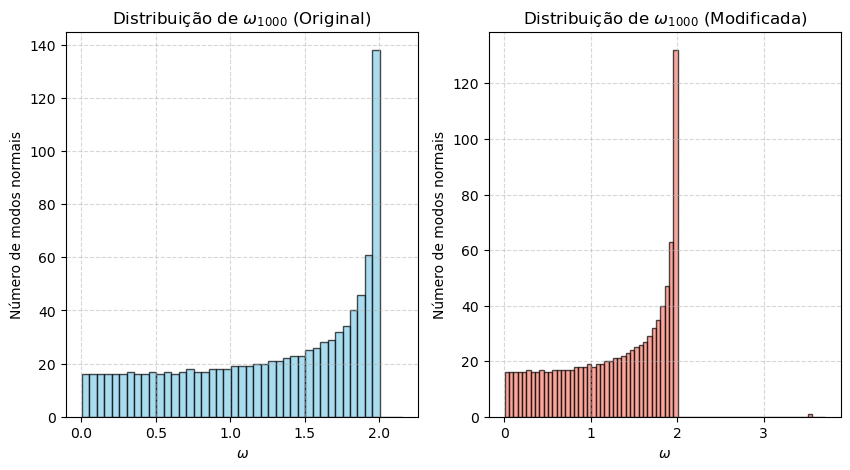

In [9]:
# Configuração do histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# --- Subplot 1: Histograma de w100 ---
ax1.hist(w1000, 
         bins=np.arange(min(w1000), max(w1000) + 0.2, 0.05),
         edgecolor='black',
         color='skyblue',
         alpha=0.7)
ax1.set_title('Distribuição de $\omega_{1000}$ (Original)')
ax1.set_xlabel('$\omega$')
ax1.set_ylabel('Número de modos normais')
ax1.grid(linestyle='--', alpha=0.5)

# --- Subplot 2: Histograma de w100_mod ---
ax2.hist(w1000_mod, 
         bins=np.arange(min(w1000_mod), max(w1000_mod) + 0.2, 0.05),
         edgecolor='black',
         color='salmon',
         alpha=0.7)
ax2.set_title('Distribuição de $\omega_{1000}$ (Modificada)')
ax2.set_xlabel('$\omega$')
ax2.set_ylabel('Número de modos normais')
ax2.grid(linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.show()

#### Outros

### Cadeia de 10000 átomos

In [10]:
# Inicializa a matriz D com zeros
D10000 = np.zeros((N3, N3))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(N3):
    if i == N3-1:  # Última massa
        D10000[i, i] = 2*k1/m
        D10000[i, i-1] = -k1/m
    else:  
        D10000[i, i] = 2*k1/m
        D10000[i, i-1] = -k1/m
        D10000[i, i+1] = -k1/m
       
#cria a matriz com problema de massa
D10000_mod = D10000.copy()
D10000_mod[4999, :] *= k2

In [11]:
ww_10000, v_10000 = eigh(D10000)
w10000 = np.sqrt(ww_10000)

In [12]:
ww10000_mod, v10000_mod = eigh(D10000_mod)
w10000_mod = np.sqrt(ww10000_mod)

/tmp/ipykernel_5211/1176228910.py:2: RuntimeWarning: invalid value encountered in sqrt
  w10000_mod = np.sqrt(ww10000_mod)


<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:21: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_5211/3537841779.py:21: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_title('Distribuição de $\omega_{10000}$ (Modificada)')


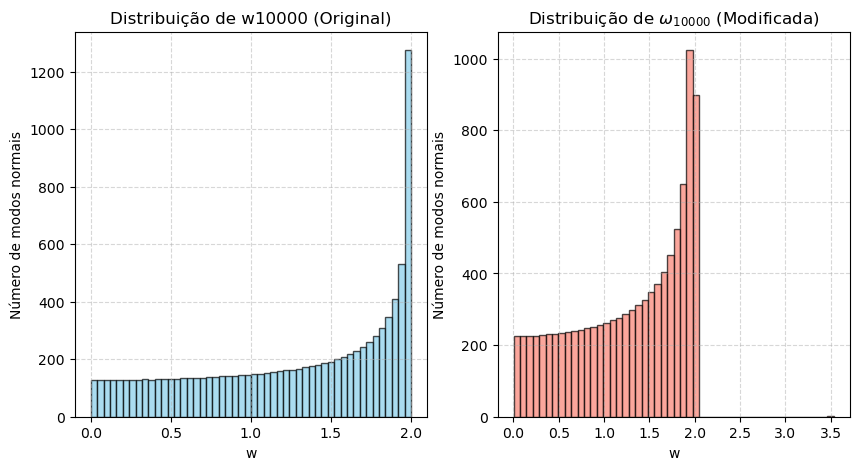

In [13]:
# Configuração do histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# --- Subplot 1: Histograma de w100 ---
ax1.hist(w10000, 
         bins=50,
         edgecolor='black',
         color='skyblue',
         alpha=0.7)
ax1.set_title('Distribuição de w10000 (Original)')
ax1.set_xlabel('w')
ax1.set_ylabel('Número de modos normais')
ax1.grid(linestyle='--', alpha=0.5)

# --- Subplot 2: Histograma de w10000_mod ---
ax2.hist(w10000_mod, 
         bins=50,
         edgecolor='black',
         color='salmon',
         alpha=0.7)
ax2.set_title('Distribuição de $\omega_{10000}$ (Modificada)')
ax2.set_xlabel('w')
ax2.set_ylabel('Número de modos normais')
ax2.grid(linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.show()

<Figure size 640x480 with 0 Axes>

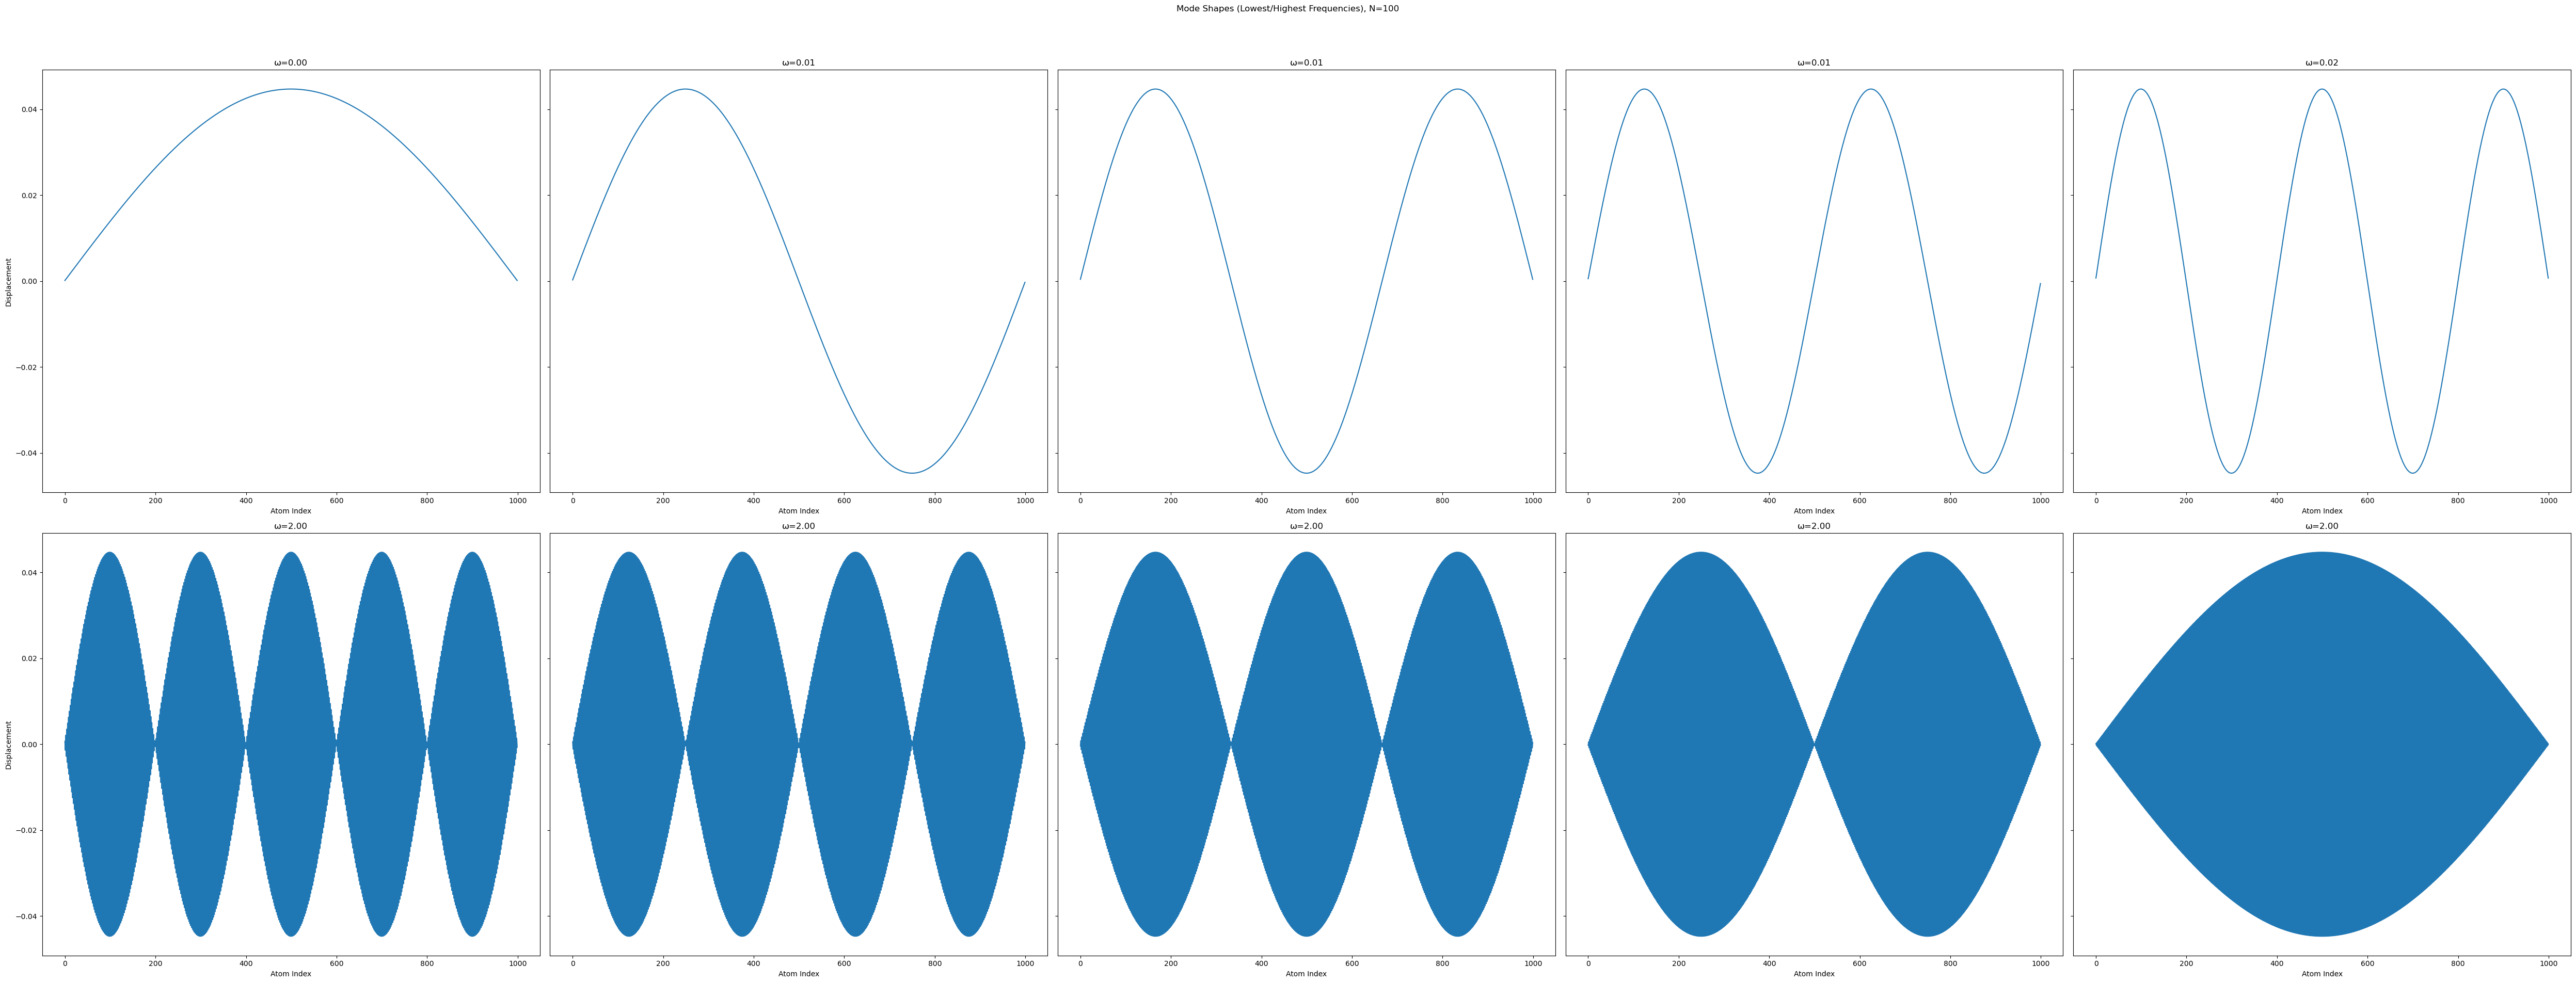

In [30]:
#Parâmetros
#m, k1, k2 = 1.0, 1.0, 5.0
#N1, N2, N3 = 100, 1000, 10000

plt.figure()
modes_to_plot = list(range(5)) + list(range(N2-5, N2))
fig, axs = plt.subplots(2, 5, figsize=(50, 20), sharey=True)
for idx, mode in enumerate(modes_to_plot):
    ax = axs[idx//5, idx%5]
    ax.plot(v_1000[:, mode], marker='.', markersize = 0.1, markeredgecolor='none')
    ax.set_title(f'ω={w1000[mode]:.2f}')
    ax.set_xlabel('Atom Index')
    if idx % 5 == 0:
        ax.set_ylabel('Displacement')
fig.suptitle('Mode Shapes (Lowest/Highest Frequencies), N=100')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>

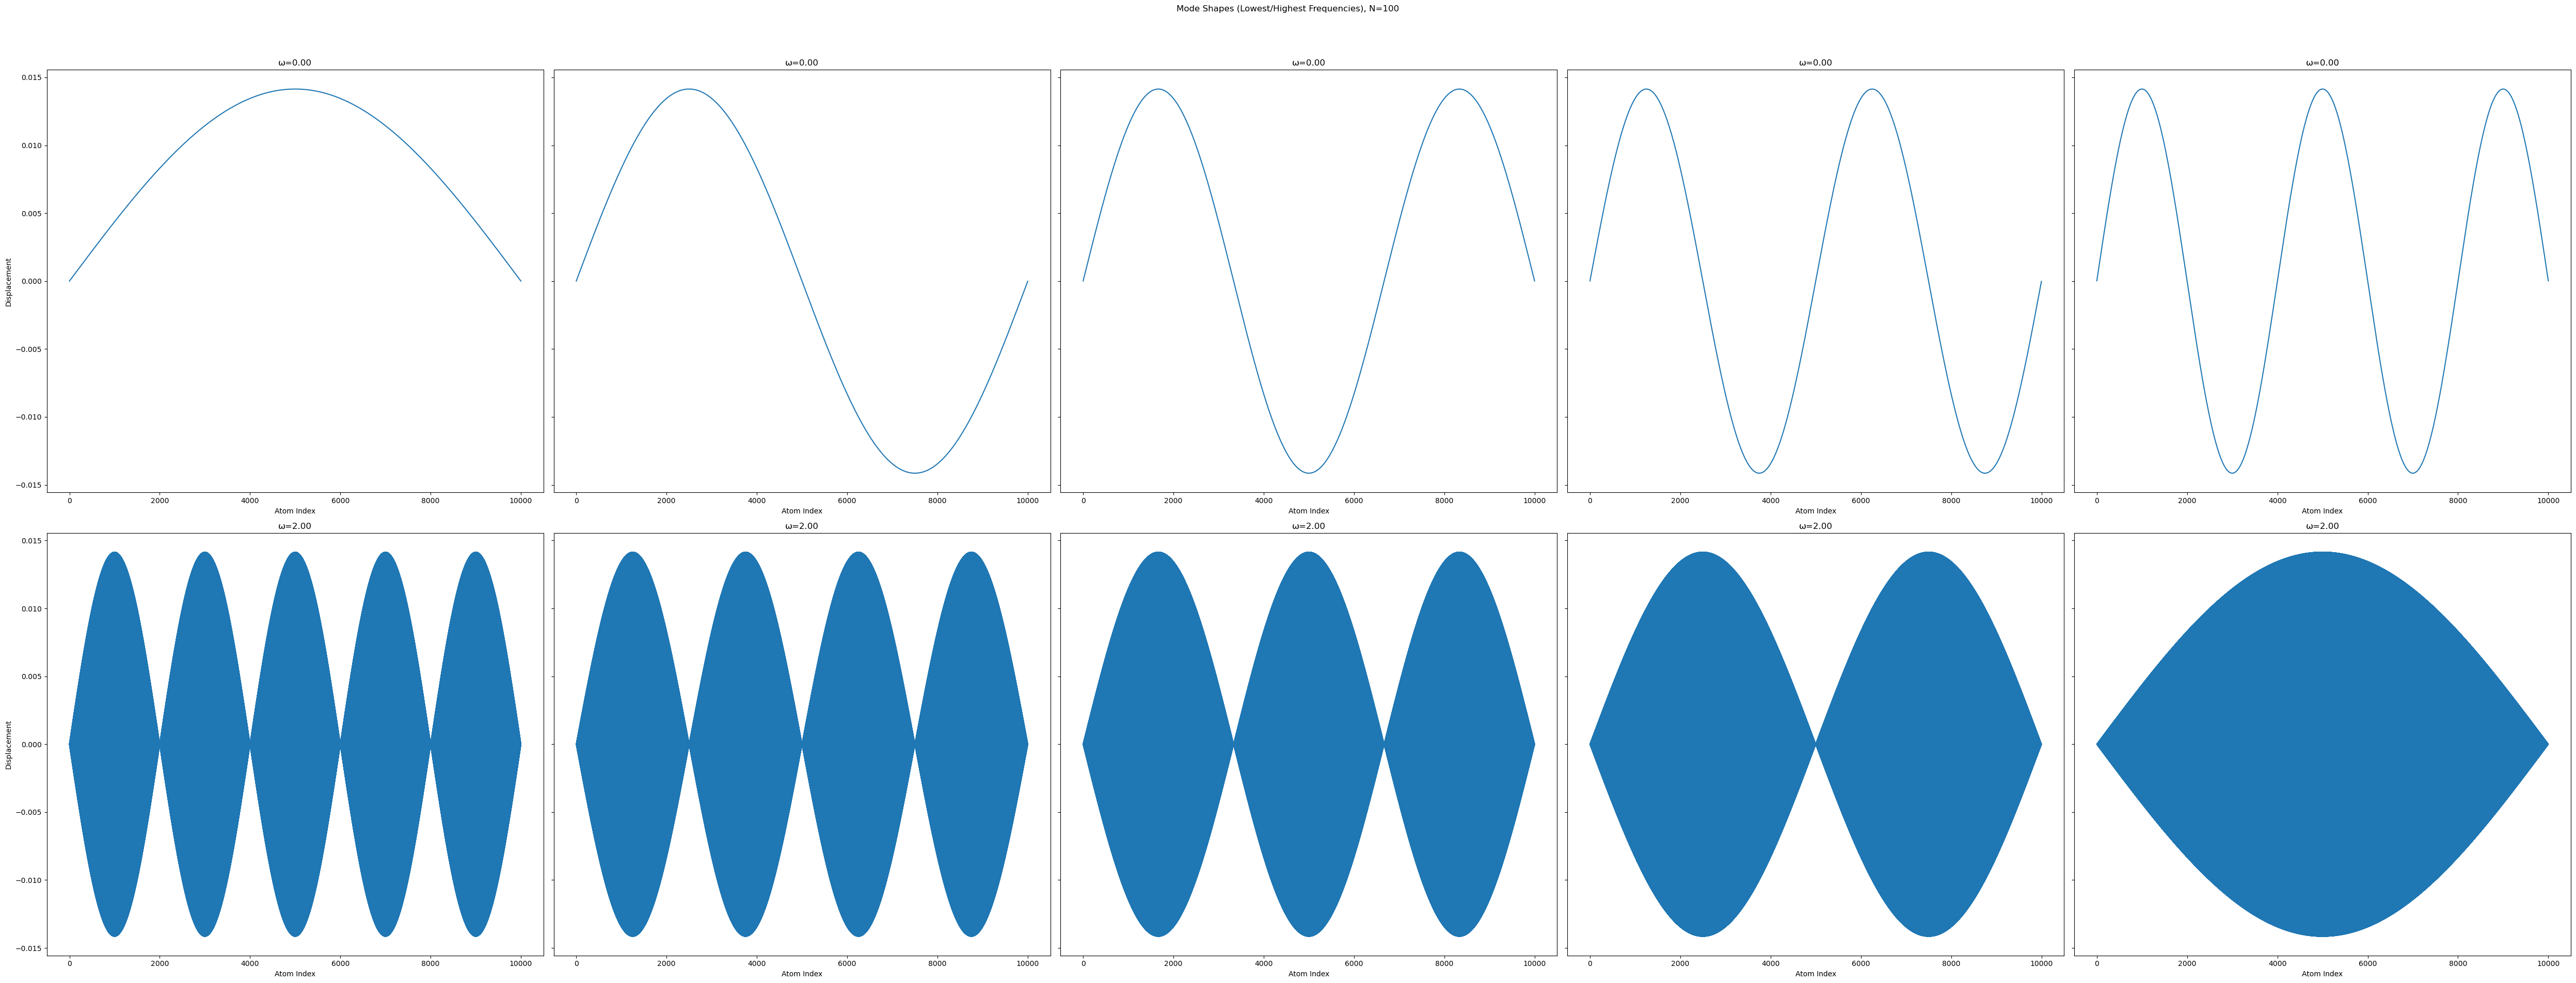

In [31]:
plt.figure()
modplot = list(range(5)) + list(range(N3-5, N3))
fig, axs = plt.subplots(2, 5, figsize=(50, 20), sharey=True)
for idx, mode in enumerate(modplot):
    ax = axs[idx//5, idx%5]
    ax.plot(v_10000[:, mode], marker='.', markersize = 0.1, markeredgecolor='none')
    ax.set_title(f'ω={w10000[mode]:.2f}')
    ax.set_xlabel('Atom Index')
    if idx % 5 == 0:
        ax.set_ylabel('Displacement')
fig.suptitle('Mode Shapes (Lowest/Highest Frequencies), N=100')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()